## <center>Лабораторная работа №2. Supervised Learning</center>

## Данные

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.set_option('display.max_columns', 40)

pd.set_option('display.max_colwidth', -1)

In [314]:
data = pd.read_csv("students_data.csv")
data = data.dropna()
data.shape

(1044, 35)

In [201]:
data.head(5)

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3,2,1,1,4,5,12,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5,3,4,1,3,3,2,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4,4,5,3,5,5,0,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4,4,3,1,1,3,4,14,15,16
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,4,5,2,12,13,13
5,103144,Por,GP,M,18,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,3,3,4,4,5,4,2,11,11,12
6,105257,Por,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
7,107639,Por,MS,F,15,R,GT3,T,4,4,teacher,other,course,mother,2,1,0,no,no,no,no,yes,yes,yes,yes,1,5,1,3,5,5,0,13,14,14
8,107914,Math,GP,F,15,U,LE3,T,3,2,services,other,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,4,4,1,1,5,10,7,6,6
9,108089,Por,MS,M,16,R,GT3,T,3,4,other,health,other,mother,3,2,0,no,no,no,no,no,yes,no,no,3,4,5,1,2,5,4,9,10,11


## Часть 1. Первичный анализ данных

# Задание 1

In [315]:
data['schoolsup'] = data['schoolsup'].map({'no' : 0, 'yes' : 1})
data['famsup'] = data['famsup'].map({'no' : 0, 'yes' : 1})
data['paid'] = data['paid'].map({'no' : 0, 'yes' : 1})
data['activities'] = data['activities'].map({'no' : 0, 'yes' : 1})
data['nursery'] = data['nursery'].map({'no' : 0, 'yes' : 1})
data['higher'] = data['higher'].map({'no' : 0, 'yes' : 1})
data['internet'] = data['internet'].map({'no' : 0, 'yes' : 1})
data['romantic'] = data['romantic'].map({'no' : 0, 'yes' : 1})
data['famsize'] = data['famsize'].map({'LE3' : 0, 'GT3' : 1})
data['Pstatus'] = data['Pstatus'].map({'A' : 0, 'T' : 1})
#data['age'] = data['age'] - 14

data.schoolsup = data.schoolsup.astype('category')
data.famsup = data.famsup.astype('category')
data.paid = data.paid.astype('category')
data.activities = data.activities.astype('category')
data.nursery = data.nursery.astype('category')
data.higher = data.higher.astype('category')
data.internet = data.internet.astype('category')
data.romantic = data.romantic.astype('category')
data.famsize = data.famsize.astype('category')
data.Pstatus = data.Pstatus.astype('category')

data['Por'] = data['Subject'].map({'Math' : 0, 'Por' : 1})
data['Math'] = data['Subject'].map({'Por' : 0, 'Math' : 1})
data = data.drop(['Subject'], axis=1)
data['GP'] = data['school'].map({'MS' : 0, 'GP' : 1})
data['MS'] = data['school'].map({'GP' : 0, 'MS' : 1})
data = data.drop(['school'], axis=1)
data['Male'] = data['sex'].map({'F' : 0, 'M' : 1})
data['Female'] = data['sex'].map({'M' : 0, 'F' : 1})
data = data.drop(['sex'], axis=1)

data.Por = data.Por.astype('category')
data.Math = data.Math.astype('category')
data.GP = data.GP.astype('category')
data.MS = data.MS.astype('category')
data.Male = data.Male.astype('category')
data.Female = data.Female.astype('category')

data = data.drop(['ID', 'address', 'Mjob', 'Fjob', 'reason', 'guardian'], axis=1, inplace=False)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 1043
Data columns (total 32 columns):
age           1044 non-null int64
famsize       1044 non-null category
Pstatus       1044 non-null category
Medu          1044 non-null int64
Fedu          1044 non-null int64
traveltime    1044 non-null int64
studytime     1044 non-null int64
failures      1044 non-null int64
schoolsup     1044 non-null category
famsup        1044 non-null category
paid          1044 non-null category
activities    1044 non-null category
nursery       1044 non-null category
higher        1044 non-null category
internet      1044 non-null category
romantic      1044 non-null category
famrel        1044 non-null int64
freetime      1044 non-null int64
goout         1044 non-null int64
Dalc          1044 non-null int64
Walc          1044 non-null int64
health        1044 non-null int64
absences      1044 non-null int64
G1            1044 non-null int64
G2            1044 non-null int64
G3           

In [206]:
data.head(5)

,age,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Por,Math,GP,MS,Male,Female
0,2,1,0,3,4,1,1,0,0,0,0,0,1,1,1,0,3,2,1,1,4,5,12,15,13,14,1,0,1,0,0,1
1,3,1,1,3,2,1,2,0,0,0,0,1,0,1,1,0,5,3,4,1,3,3,2,17,18,17,1,0,1,0,0,1
2,2,0,1,1,2,2,1,2,0,0,0,0,0,1,1,0,4,4,5,3,5,5,0,9,8,10,1,0,1,0,1,0
3,3,1,1,2,3,2,2,0,0,0,0,1,1,1,1,0,4,4,3,1,1,3,4,14,15,16,1,0,0,1,1,0
4,2,1,1,1,1,2,1,0,0,1,0,0,1,1,0,0,4,3,2,1,4,5,2,12,13,13,1,0,1,0,0,1


In [13]:
data.describe(include=['category'])

,famsize,Pstatus,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,Por,Math,GP,MS,Male,Female
count,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,1,1,0,1,0,0,1,1,1,0,1,0,1,0,0,1
freq,738,923,925,640,824,528,835,955,827,673,649,649,772,772,591,591


In [14]:
data.describe(include=['int64'])

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


# Задание 2

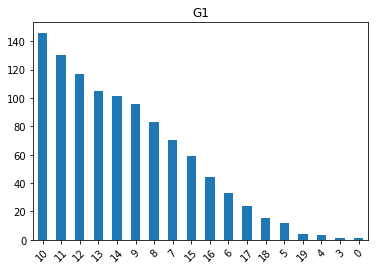

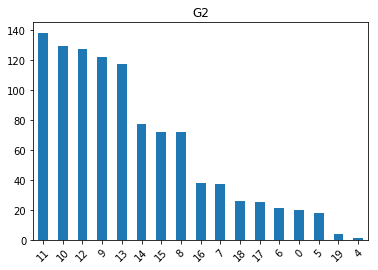

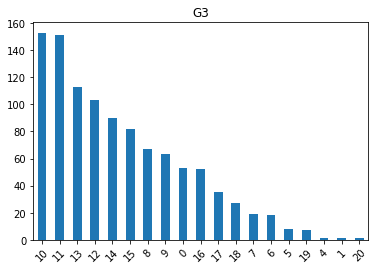

In [6]:
pd.crosstab(data['Subject'], data['G1'])
data.G1.value_counts().plot(kind='bar', rot=45, title='G1') 
plt.show()
data.G2.value_counts().plot(kind='bar', rot=45, title='G2') 
plt.show()
data.G3.value_counts().plot(kind='bar', rot=45, title='G3') 
plt.show() 

In [19]:
pd.crosstab(data['Subject'], data['G2'])

G2,0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Subject,,,,,,,,,,,,,,,,,
Math,13,1,15,14,21,32,50,46,35,41,37,23,34,13,5,12,3
Por,7,0,3,7,16,40,72,83,103,86,80,54,38,25,20,14,1


In [20]:
pd.crosstab(data['Subject'], data['G3'])

G3,0,1,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Subject,,,,,,,,,,,,,,,,,,,
Math,38,0,1,7,15,9,32,28,56,47,31,31,27,33,16,6,12,5,1
Por,15,1,0,1,3,10,35,35,97,104,72,82,63,49,36,29,15,2,0


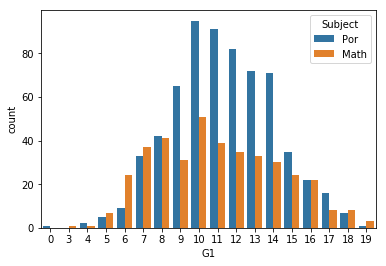

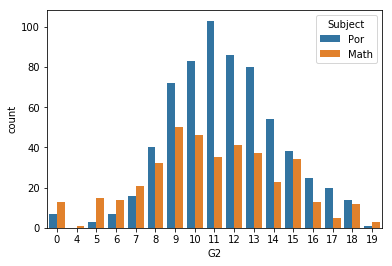

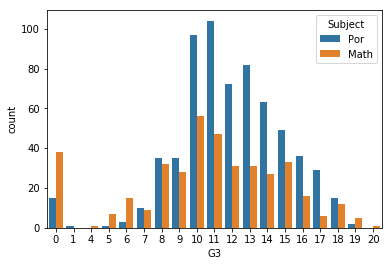

In [7]:
sns.countplot(x='G1', hue='Subject', data=data)
plt.show()
sns.countplot(x='G2', hue='Subject', data=data)
plt.show()
sns.countplot(x='G3', hue='Subject', data=data)
plt.show()

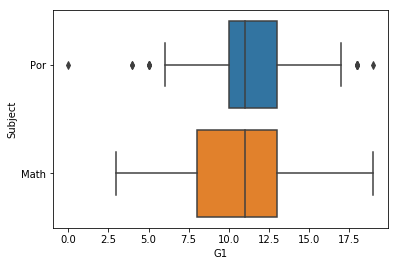

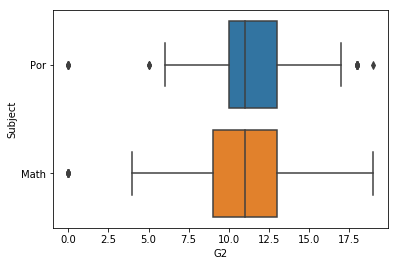

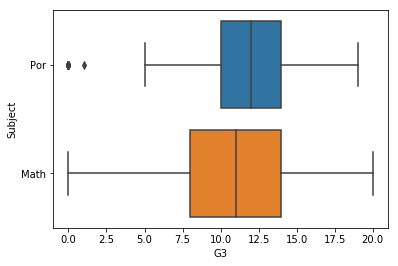

In [8]:
sns.boxplot(x="G1", y="Subject", data = data)
plt.show()
sns.boxplot(x="G2", y="Subject", data = data)
plt.show()
sns.boxplot(x="G3", y="Subject", data = data)
plt.show()

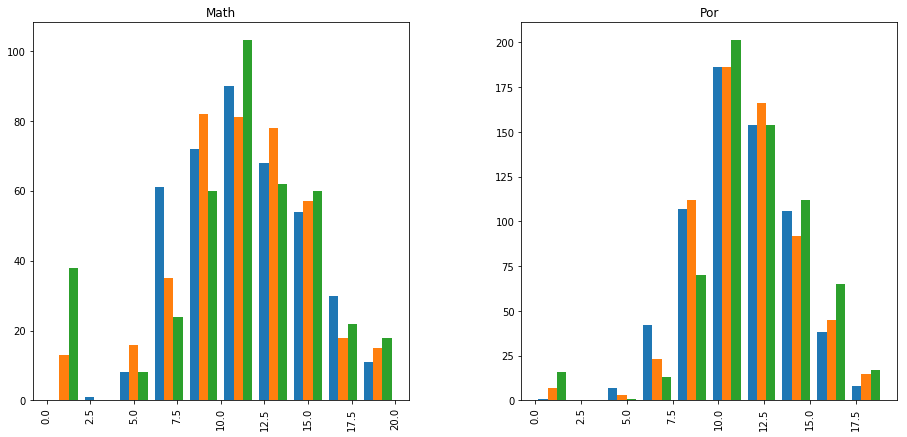

In [15]:
data[['G1']+['G2']+['G3']].hist(by=data['Subject'], figsize = (15, 7))
plt.show()

# Задание 3

In [59]:
pd.crosstab(data['sex'], data['G3'])

G3,0,1,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
sex,,,,,,,,,,,,,,,,,,,
F,30,0,1,3,13,11,34,33,82,83,55,71,55,48,29,24,16,3,0
M,23,1,0,5,5,8,33,30,71,68,48,42,35,34,23,11,11,4,1


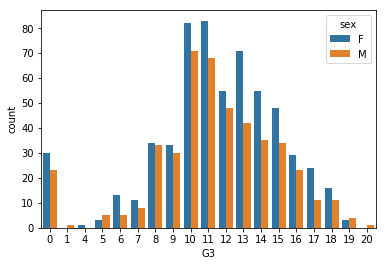

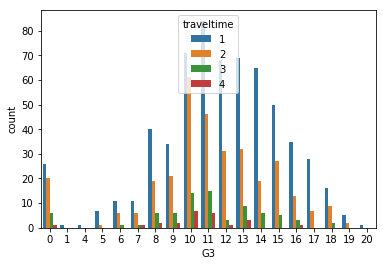

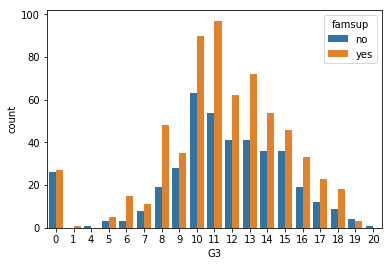

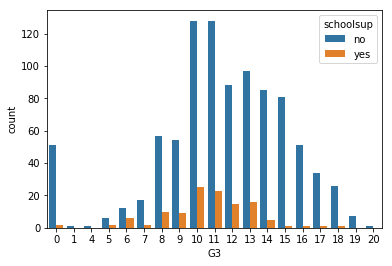

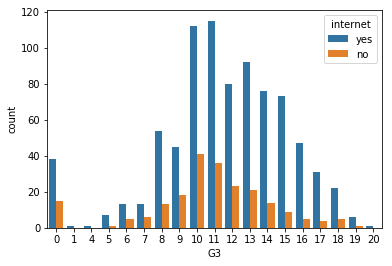

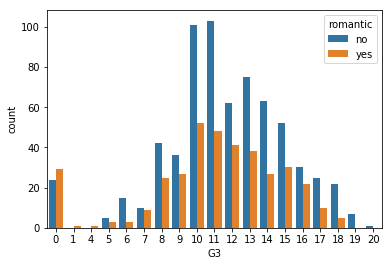

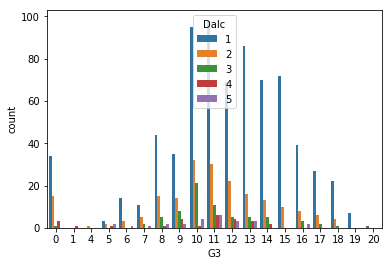

In [25]:
sns.countplot(x='G3', hue='sex', data=data)
plt.show()
sns.countplot(x='G3', hue='traveltime', data=data)
plt.show()
sns.countplot(x='G3', hue='famsup', data=data)
plt.show()
sns.countplot(x='G3', hue='schoolsup', data=data)
plt.show()
sns.countplot(x='G3', hue='internet', data=data)
plt.show()
sns.countplot(x='G3', hue='romantic', data=data)
plt.show()
sns.countplot(x='G3', hue='Dalc', data=data)
plt.show()

# Задание 4

In [96]:
print('  Неудовлетворительно')
print(pd.crosstab(data['G3'], data['reason'])[-19:-13].sum())
print('  Удовлетворительно')
print(pd.crosstab(data['G3'], data['reason'])[-13:-7].sum())
print('  Хорошо')
print(pd.crosstab(data['G3'], data['reason'])[-7:-3].sum())
print('  Отлично')
print(pd.crosstab(data['G3'], data['reason'])[-3:].sum())

  Неудовлетворительно
reason
course        46
home          22
other         14
reputation    18
dtype: int64
  Удовлетворительно
reason
course        282
home          168
other          69
reputation    131
dtype: int64
  Хорошо
reason
course        89
home          60
other         23
reputation    87
dtype: int64
  Отлично
reason
course        13
home           8
other          2
reputation    12
dtype: int64


# Задание 5

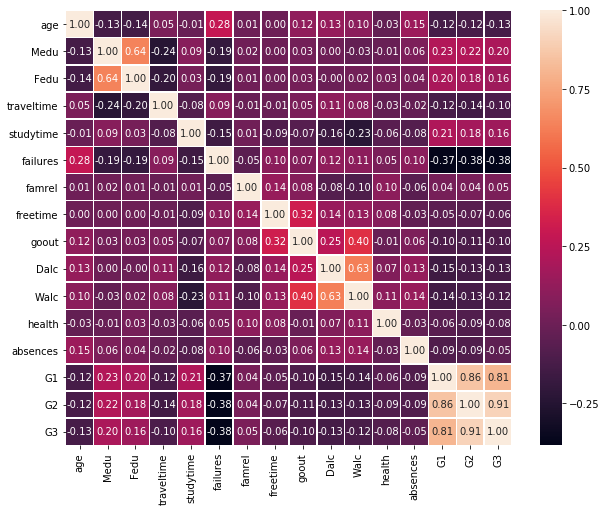

In [318]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", linewidths=.5)
plt.show()

Из таблицы видно, что признаки G1, G2 больше всех влияют на итоговую оценку. 
Также видно, что признаки absences, Walc, Dalc, goout, failures и traveltime отрицательно влияют на результат.
Положительно влияют Medu, Fedu, studytime, famrel.

# Часть 2

In [5]:
from sklearn.model_selection import train_test_split

In [185]:
data = data.drop(['G2'], axis=1)
data2 = data.copy()
data2 = data2.drop(['G1'], axis=1)

In [246]:
(trainData, 
 testData, 
 trainDependentVariables, 
 testDependentVariables) = train_test_split(data.drop('G3', axis=1),
                                            data['G3'],
                                            test_size=0.3, 
                                            random_state=5)

In [236]:
trainData.shape

(730, 29)

In [237]:
testData.shape

(314, 29)

# Линейная регрессия

In [32]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import KFold

In [247]:
regressionModel = linear_model.LinearRegression()

regressionModel.fit(trainData, trainDependentVariables)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [248]:
predictedDependentVariables = regressionModel.predict(testData)

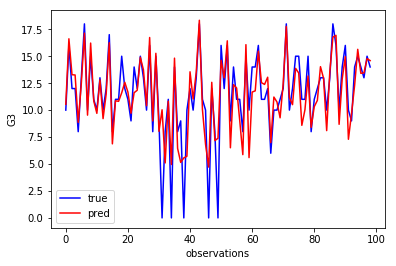

In [249]:
plt.plot(testDependentVariables[1:100].values, 'b-', label='true')
plt.plot(predictedDependentVariables[1:100], 'r-', label='pred')

plt.xlabel("observations")
plt.ylabel("G3")

plt.legend(loc='best')

plt.show()

In [250]:
mse = metrics.mean_squared_error(y_pred=predictedDependentVariables, 
                                 y_true=testDependentVariables)

rmse = np.sqrt(mse)

mae = metrics.mean_absolute_error(y_pred=predictedDependentVariables, 
                                  y_true=testDependentVariables)

medae = metrics.median_absolute_error(y_pred=predictedDependentVariables, 
                                      y_true=testDependentVariables)

R2 = metrics.r2_score(y_pred=predictedDependentVariables, 
                      y_true=testDependentVariables)
print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedAE: {}".format(mse, rmse, R2, mae, medae))

MSE:   4.556322630456208
RMSE:  2.1345544337065308
R2:    0.6847560867958371
MAE:   1.4116053654393668
MedAE: 0.9642194912530169


In [251]:
pd.Series(sorted(regressionModel.coef_, 
                 key=abs, 
                 reverse=True), 
          index=trainData.columns)

age           1.010379
famsize       0.581940
Pstatus      -0.581940
Medu         -0.576256
Fedu         -0.430468
traveltime    0.361890
studytime    -0.264157
failures      0.263675
schoolsup     0.214447
famsup       -0.117218
paid         -0.106739
activities    0.086082
nursery      -0.083881
higher       -0.083464
internet      0.073305
romantic     -0.073305
famrel        0.068977
freetime      0.057217
goout        -0.055507
Dalc          0.049762
Walc         -0.041268
health       -0.036400
absences      0.034732
G1            0.032895
Por          -0.030076
Math          0.020075
GP            0.008470
MS            0.008001
Male         -0.004151
Female        0.004151
dtype: float64

Без G1

In [252]:
(trainData, 
 testData, 
 trainDependentVariables, 
 testDependentVariables) = train_test_split(data2.drop('G3', axis=1),
                                            data2['G3'],
                                            test_size=0.3, 
                                            random_state=5)

In [253]:
regressionModel.fit(trainData, trainDependentVariables)
predictedDependentVariables = regressionModel.predict(testData)

mse = metrics.mean_squared_error(y_pred=predictedDependentVariables, 
                                 y_true=testDependentVariables)

rmse = np.sqrt(mse)

mae = metrics.mean_absolute_error(y_pred=predictedDependentVariables, 
                                  y_true=testDependentVariables)

medae = metrics.median_absolute_error(y_pred=predictedDependentVariables, 
                                      y_true=testDependentVariables)

R2 = metrics.r2_score(y_pred=predictedDependentVariables, 
                      y_true=testDependentVariables)
print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedAE: {}".format(mse, rmse, R2, mae, medae))

MSE:   10.338501102620398
RMSE:  3.215353962259894
R2:    0.284697373607786
MAE:   2.354195750447211
MedAE: 1.8231116735776336


In [254]:
pd.Series(sorted(regressionModel.coef_, 
                 key=abs, 
                 reverse=True), 
          index=trainData.columns)

age           1.686441
famsize      -1.418333
Pstatus      -1.364969
Medu          0.856622
Fedu         -0.856622
traveltime   -0.701363
studytime     0.589193
failures     -0.589193
schoolsup     0.489531
famsup       -0.480813
paid         -0.374150
activities    0.320135
nursery       0.313722
higher       -0.270198
internet     -0.267909
romantic      0.190248
famrel       -0.186979
freetime      0.142615
goout        -0.136655
Dalc         -0.127549
Walc         -0.100205
health       -0.097134
absences      0.097134
Por           0.094263
Math          0.087998
GP            0.070082
MS           -0.023184
Male          0.007284
Female       -0.001305
dtype: float64

# Гребневая регрессия

In [186]:
(trainData, 
 testData, 
 trainDependentVariables, 
 testDependentVariables) = train_test_split(data.drop('G3', axis=1),
                                            data['G3'],
                                            test_size=0.3, 
                                            random_state=5)

In [256]:
ridgeModel = linear_model.Ridge(alpha=1)

ridgeModel.fit(trainData, trainDependentVariables)
predictedDependentVariables = ridgeModel.predict(testData)

In [257]:
mse = metrics.mean_squared_error(y_pred=predictedDependentVariables, 
                                 y_true=testDependentVariables)

rmse = np.sqrt(mse)

mae = metrics.mean_absolute_error(y_pred=predictedDependentVariables, 
                                  y_true=testDependentVariables)

medae = metrics.median_absolute_error(y_pred=predictedDependentVariables, 
                                      y_true=testDependentVariables)

R2 = metrics.r2_score(y_pred=predictedDependentVariables, 
                      y_true=testDependentVariables)

print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedAE: {}".format(mse, rmse, R2, mae, medae))

MSE:   4.55573164740248
RMSE:  2.1344159968015792
R2:    0.6847969758692424
MAE:   1.411282732209139
MedAE: 0.9628297500375345


In [258]:
from sklearn.metrics import mean_squared_error
ridgeModel = linear_model.RidgeCV(alphas=np.array(range(0, 50, 1))/10, 
                                  cv=5,
                                 scoring='neg_mean_squared_error')

ridgeModel.fit(trainData, trainDependentVariables)

C:\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.4536296204197061e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 7.931572431913462e-35
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.3366115048636238e-19
  ' condition number: {}'.format(rcond), RuntimeWarning)


RidgeCV(alphas=array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9]),
    cv=5, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring='neg_mean_squared_error', store_cv_values=False)

In [259]:
ridgeModel.alpha_

4.9000000000000004

In [260]:
predictedDependentVariables = ridgeModel.predict(testData)

In [261]:
mse = metrics.mean_squared_error(y_pred=predictedDependentVariables, 
                                 y_true=testDependentVariables)

rmse = np.sqrt(mse)

mae = metrics.mean_absolute_error(y_pred=predictedDependentVariables, 
                                  y_true=testDependentVariables)

medae = metrics.median_absolute_error(y_pred=predictedDependentVariables, 
                                      y_true=testDependentVariables)

R2 = metrics.r2_score(y_pred=predictedDependentVariables, 
                      y_true=testDependentVariables)

print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedAE: {}".format(mse, rmse, R2, mae, medae))

MSE:   4.553781874569693
RMSE:  2.13395920171162
R2:    0.6849318772069041
MAE:   1.4102451835549152
MedAE: 0.968333312752633


In [262]:
pd.Series(sorted(ridgeModel.coef_, 
                 key=abs, 
                 reverse=True), 
          index=trainData.columns)

age           1.009533
famsize       0.568472
Pstatus      -0.568472
Medu         -0.557227
Fedu         -0.423862
traveltime    0.335612
studytime    -0.245463
failures      0.239293
schoolsup     0.203506
famsup       -0.110665
paid         -0.106053
activities   -0.083583
nursery       0.081344
higher       -0.080829
internet      0.073567
romantic     -0.073567
famrel        0.068994
freetime      0.057452
goout        -0.054587
Dalc          0.048760
Walc         -0.042038
health       -0.036624
absences      0.034482
G1            0.033275
Por          -0.028989
Math          0.016907
GP            0.008734
MS            0.008381
Male         -0.003162
Female        0.003162
dtype: float64

# Лассо

In [263]:
lassoModel = linear_model.Lasso(alpha=0)

lassoModel.fit(trainData, trainDependentVariables)

predictedDependentVariables = lassoModel.predict(testData)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [264]:
mse = metrics.mean_squared_error(y_pred=predictedDependentVariables, 
                                 y_true=testDependentVariables)

rmse = np.sqrt(mse)

mae = metrics.mean_absolute_error(y_pred=predictedDependentVariables, 
                                  y_true=testDependentVariables)

medae = metrics.median_absolute_error(y_pred=predictedDependentVariables, 
                                      y_true=testDependentVariables)

R2 = metrics.r2_score(y_pred=predictedDependentVariables, 
                      y_true=testDependentVariables)

print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedAE: {}".format(mse, rmse, R2, mae, medae))

MSE:   4.556322630456209
RMSE:  2.1345544337065308
R2:    0.6847560867958371
MAE:   1.411605365439364
MedAE: 0.9642194912530284


In [265]:
lassoModel = linear_model.LassoCV(alphas=np.array(range(1, 100, 1))/100, 
                                  cv=5)

lassoModel.fit(trainData, trainDependentVariables)

LassoCV(alphas=array([ 0.01,  0.02, ...,  0.98,  0.99]), copy_X=True, cv=5,
    eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=False, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [266]:
lassoModel.alpha_

0.059999999999999998

In [267]:
predictedDependentVariables = lassoModel.predict(testData)

In [268]:
mse = metrics.mean_squared_error(y_pred=predictedDependentVariables, 
                                 y_true=testDependentVariables)

rmse = np.sqrt(mse)

mae = metrics.mean_absolute_error(y_pred=predictedDependentVariables, 
                                  y_true=testDependentVariables)

medae = metrics.median_absolute_error(y_pred=predictedDependentVariables, 
                                      y_true=testDependentVariables)

R2 = metrics.r2_score(y_pred=predictedDependentVariables, 
                      y_true=testDependentVariables)

print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedAE: {}".format(mse, rmse, R2, mae, medae))

MSE:   4.612064788586478
RMSE:  2.1475718354892064
R2:    0.6808993853537639
MAE:   1.4096456609574863
MedAE: 0.9079068448919978


In [269]:
pd.Series(sorted(lassoModel.coef_, 
                 key=abs, 
                 reverse=True), 
          index=trainData.columns)

age           1.013805e+00
famsize       7.699573e-01
Pstatus      -2.914241e-01
Medu         -2.479199e-01
Fedu         -6.015420e-02
traveltime    3.115237e-02
studytime    -1.808064e-02
failures     -3.044083e-03
schoolsup    -8.279005e-17
famsup        0.000000e+00
paid         -0.000000e+00
activities   -0.000000e+00
nursery       0.000000e+00
higher        0.000000e+00
internet     -0.000000e+00
romantic      0.000000e+00
famrel        0.000000e+00
freetime      0.000000e+00
goout        -0.000000e+00
Dalc         -0.000000e+00
Walc          0.000000e+00
health        0.000000e+00
absences      0.000000e+00
G1           -0.000000e+00
Por          -0.000000e+00
Math         -0.000000e+00
GP            0.000000e+00
MS           -0.000000e+00
Male         -0.000000e+00
Female        0.000000e+00
dtype: float64

In [270]:
lassoModel = linear_model.Lasso(alpha=0.01).fit(trainData, trainDependentVariables)

predictedDependentVariables = lassoModel.predict(testData)

pd.Series(sorted(lassoModel.coef_, 
                 key=abs, 
                 reverse=True), 
          index=trainData.columns)

age           1.082773e+00
famsize       1.009635e+00
Pstatus      -5.165356e-01
Medu         -4.002728e-01
Fedu          2.460336e-01
traveltime    1.677566e-01
studytime    -1.636946e-01
failures      1.539845e-01
schoolsup    -1.050211e-01
famsup       -9.174142e-02
paid         -7.953421e-02
activities    6.045228e-02
nursery       5.305136e-02
higher       -4.418953e-02
internet     -4.052385e-02
romantic     -3.999731e-02
famrel       -3.669457e-02
freetime      3.549307e-02
goout         1.227035e-02
Dalc          1.101454e-02
Walc         -1.322908e-03
health       -1.288420e-15
absences     -0.000000e+00
G1           -0.000000e+00
Por           0.000000e+00
Math          0.000000e+00
GP            0.000000e+00
MS            0.000000e+00
Male         -0.000000e+00
Female        0.000000e+00
dtype: float64

# KNN

In [65]:
from sklearn import preprocessing

In [187]:
data.iloc[:,1:] = preprocessing.scale(data.iloc[:,1:])

In [64]:
from sklearn.neighbors import KNeighborsRegressor

In [188]:
knrModel = KNeighborsRegressor(n_neighbors=5)

knrModel.fit(trainData, trainDependentVariables)

predictedDependentVariables = knrModel.predict(testData) 

In [189]:
mse = metrics.mean_squared_error(y_pred=predictedDependentVariables, 
                                 y_true=testDependentVariables)

rmse = np.sqrt(mse)

mae = metrics.mean_absolute_error(y_pred=predictedDependentVariables, 
                                  y_true=testDependentVariables)

medae = metrics.median_absolute_error(y_pred=predictedDependentVariables, 
                                      y_true=testDependentVariables)

R2 = metrics.r2_score(y_pred=predictedDependentVariables, 
                      y_true=testDependentVariables)

print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedAE: {}".format(mse, rmse, R2, mae, medae))

MSE:   4.876942675159236
RMSE:  2.2083801020565357
R2:    0.66257295233818
MAE:   1.4713375796178343
MedAE: 1.0


Кросс-валидация, для оценки качества модели была использована ошибка median absolute error

In [190]:
minErr = 1.1
param = 0
for i in range(3, 30):
    medae = 0
    kf = KFold(n_splits = 10, shuffle = True)
    knrModel = KNeighborsRegressor(n_neighbors=i)
        
    for train_index, test_index in kf.split(trainData):
            knrModel.fit(trainData.iloc[train_index], trainDependentVariables.iloc[train_index])
            predictedDependentVariables = knrModel.predict(trainData.iloc[test_index])
            medae += metrics.median_absolute_error(y_pred=predictedDependentVariables, 
                                      y_true=trainDependentVariables.iloc[test_index])
    medae = medae/10;
    if (medae < minErr):
        minErr = medae
        param = i
print(param)
print(minErr)

21
1.04285714286


In [191]:
knrModel = KNeighborsRegressor(n_neighbors=21)

knrModel.fit(trainData, trainDependentVariables)

predictedDependentVariables = knrModel.predict(testData)

mse = metrics.mean_squared_error(y_pred=predictedDependentVariables, 
                                 y_true=testDependentVariables)

rmse = np.sqrt(mse)

mae = metrics.mean_absolute_error(y_pred=predictedDependentVariables, 
                                  y_true=testDependentVariables)

medae = metrics.median_absolute_error(y_pred=predictedDependentVariables, 
                                      y_true=testDependentVariables)

R2 = metrics.r2_score(y_pred=predictedDependentVariables, 
                      y_true=testDependentVariables)

print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedAE: {}".format(mse, rmse, R2, mae, medae))

MSE:   4.352405505726706
RMSE:  2.086241957618221
R2:    0.6988647523980869
MAE:   1.4150743099787686
MedAE: 1.0476190476190474


# Radius Neighbors

In [75]:
from sklearn.neighbors import RadiusNeighborsRegressor

In [204]:
rnrModel = RadiusNeighborsRegressor(radius=3)

rnrModel.fit(trainData, trainDependentVariables)

predictedDependentVariables = rnrModel.predict(testData)
len(predictedDependentVariables)

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


314

In [205]:
is_nan = np.isnan(predictedDependentVariables)
predictedDependentVariables = predictedDependentVariables[~is_nan]
len(predictedDependentVariables)

76

In [206]:
mse = metrics.mean_squared_error(y_pred=predictedDependentVariables, 
                                 y_true=testDependentVariables[~is_nan])

rmse = np.sqrt(mse)

mae = metrics.mean_absolute_error(y_pred=predictedDependentVariables, 
                                  y_true=testDependentVariables[~is_nan])

medae = metrics.median_absolute_error(y_pred=predictedDependentVariables, 
                                      y_true=testDependentVariables[~is_nan])

R2 = metrics.r2_score(y_pred=predictedDependentVariables, 
                      y_true=testDependentVariables[~is_nan])

print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedAE: {}".format(mse, rmse, R2, mae, medae))

MSE:   7.105354532163744
RMSE:  2.665587089585284
R2:    0.3897410034381974
MAE:   1.582236842105263
MedAE: 1.0


При radius < 5.8 получается слишком много значений, для которых не удалось выполнить прогноз 

In [210]:
rnrModel = RadiusNeighborsRegressor(radius=5.8)

rnrModel.fit(trainData, trainDependentVariables)

predictedDependentVariables = rnrModel.predict(testData)

is_nan = np.isnan(predictedDependentVariables)
predictedDependentVariables = predictedDependentVariables[~is_nan]
print(len(predictedDependentVariables))

mse = metrics.mean_squared_error(y_pred=predictedDependentVariables, 
                                 y_true=testDependentVariables[~is_nan])

rmse = np.sqrt(mse)

mae = metrics.mean_absolute_error(y_pred=predictedDependentVariables, 
                                  y_true=testDependentVariables[~is_nan])

medae = metrics.median_absolute_error(y_pred=predictedDependentVariables, 
                                      y_true=testDependentVariables[~is_nan])

R2 = metrics.r2_score(y_pred=predictedDependentVariables, 
                      y_true=testDependentVariables[~is_nan])

print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedAE: {}".format(mse, rmse, R2, mae, medae))

313
MSE:   4.92515312079726
RMSE:  2.219268600417097
R2:    0.6603021043895685
MAE:   1.494671635158114
MedAE: 1.0823529411764703


C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


Качество решения получилось ниже без использования признака G1 (ошибка почти в 2 раза больше).
Признаки sex, school, subject, G1, absences - имеют наибольшие веса. 
Наименьший вес у age, famsize, Pstatus, Medu, Fedu, traveltime.

# Задание 2. Бинарная классификация

In [212]:
data2['passed'] = data2['G3']
data2.loc[data2['passed'] < 8, 'passed'] = 0
data2.loc[data2['passed'] >= 8, 'passed'] = 1
data2.head(10)

,age,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,Por,Math,GP,MS,Male,Female,passed
0,16,1,0,3,4,1,1,0,0,0,0,0,1,1,1,0,3,2,1,1,4,5,12,14,1,0,1,0,0,1,1
1,17,1,1,3,2,1,2,0,0,0,0,1,0,1,1,0,5,3,4,1,3,3,2,17,1,0,1,0,0,1,1
2,16,0,1,1,2,2,1,2,0,0,0,0,0,1,1,0,4,4,5,3,5,5,0,10,1,0,1,0,1,0,1
3,17,1,1,2,3,2,2,0,0,0,0,1,1,1,1,0,4,4,3,1,1,3,4,16,1,0,0,1,1,0,1
4,16,1,1,1,1,2,1,0,0,1,0,0,1,1,0,0,4,3,2,1,4,5,2,13,1,0,1,0,0,1,1
5,18,0,1,3,1,2,1,0,0,0,0,1,1,1,1,1,3,3,4,4,5,4,2,12,1,0,1,0,1,0,1
6,18,1,1,1,1,2,2,0,0,0,0,1,1,1,0,0,1,1,1,1,1,5,6,9,1,0,0,1,0,1,1
7,15,1,1,4,4,2,1,0,0,0,0,0,1,1,1,1,1,5,1,3,5,5,0,14,1,0,0,1,0,1,1
8,15,0,1,3,2,1,2,0,0,1,1,0,1,1,1,0,4,4,4,1,1,5,10,6,0,1,1,0,0,1,0
9,16,1,1,3,4,3,2,0,0,0,0,0,0,1,0,0,3,4,5,1,2,5,4,11,1,0,0,1,1,0,1


In [213]:
(trainData, 
 testData, 
 trainDependentVariables, 
 testDependentVariables) = train_test_split(data2.drop('passed', axis=1),
                                            data2['passed'],
                                            test_size=0.3, 
                                            random_state=5)

# KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [214]:
knnKlass = KNeighborsClassifier(n_neighbors=5)
knnKlass.fit(trainData, trainDependentVariables)
#cross_val_score(knnKlass, trainData, trainDependentVariables)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [215]:
predictedDependentVariables = knnKlass.predict(testData)
predictedDependentVariables

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1,

In [216]:
print(metrics.classification_report(testDependentVariables, predictedDependentVariables))

             precision    recall  f1-score   support

          0       0.95      0.77      0.85        26
          1       0.98      1.00      0.99       288

avg / total       0.98      0.98      0.98       314



Кросс-валидация на основе метрики Accuracy:

In [217]:
accuracy = 0
param = 0
for i in range(5, 20):
    error = 0
    kf = KFold(n_splits = 5, shuffle = True)
    knnKlass = KNeighborsClassifier(n_neighbors=i)
        
    for train_index, test_index in kf.split(trainData):
            knnKlass.fit(trainData.iloc[train_index], trainDependentVariables.iloc[train_index])
            predictedDependentVariables = knnKlass.predict(trainData.iloc[test_index])
            error += metrics.accuracy_score(trainDependentVariables.iloc[test_index], predictedDependentVariables)
            
    error = error/5;
    #print(error)
    if (error > accuracy):
        accuracy = error
        param = i
print(param)
print(accuracy)

6
0.97397260274


In [219]:
minEr = 0
param = 0
for i in range(5, 50):
    knnKlass = KNeighborsClassifier(n_neighbors=6, leaf_size=i)
    knnKlass.fit(trainData, trainDependentVariables)
    predictedDependentVariables = knnKlass.predict(testData)
    #print(metrics.accuracy_score(testDependentVariables, predictedDependentVariables))
    if (metrics.accuracy_score(testDependentVariables, predictedDependentVariables) > minEr):
        minEr = metrics.accuracy_score(testDependentVariables, predictedDependentVariables)
        param = i
print("leaf_size ",param) 

leaf_size  5


In [220]:
knnKlass = KNeighborsClassifier(n_neighbors=6, leaf_size=5)
knnKlass.fit(trainData, trainDependentVariables)
predictedDependentVariables = knnKlass.predict(testData)
print(metrics.classification_report(testDependentVariables, predictedDependentVariables))

             precision    recall  f1-score   support

          0       0.95      0.81      0.88        26
          1       0.98      1.00      0.99       288

avg / total       0.98      0.98      0.98       314



# Radius

In [152]:
from sklearn.neighbors import RadiusNeighborsClassifier

In [222]:
radClass = RadiusNeighborsClassifier(radius=8)
radClass.fit(trainData, trainDependentVariables)

RadiusNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, outlier_label=None, p=2, radius=8,
             weights='uniform')

In [223]:
predictedDependentVariables = radClass.predict(testData)
is_nan = np.isnan(predictedDependentVariables)
predictedDependentVariables = predictedDependentVariables[~is_nan]
len(predictedDependentVariables)

314

In [224]:
print(metrics.classification_report(testDependentVariables, predictedDependentVariables))

             precision    recall  f1-score   support

          0       1.00      0.62      0.76        26
          1       0.97      1.00      0.98       288

avg / total       0.97      0.97      0.96       314



# LogisticRegression

In [156]:
from sklearn.linear_model import LogisticRegression

In [157]:
logClass = LogisticRegression()
logClass.fit(trainData, trainDependentVariables)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [158]:
predictedDependentVariables = logClass.predict(testData)
predictedDependentVariables

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1,

In [159]:
print(metrics.classification_report(testDependentVariables, predictedDependentVariables))

             precision    recall  f1-score   support

          0       1.00      0.85      0.92        26
          1       0.99      1.00      0.99       288

avg / total       0.99      0.99      0.99       314



# DecisionTree

In [250]:
from sklearn.tree import DecisionTreeClassifier

In [251]:
dtree_model = DecisionTreeClassifier()

dtree_model.fit(trainData, trainDependentVariables)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [254]:
predictedDenendentVariable = dtree_model.predict(testData)
predictedDenendentVariable

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1,

In [255]:
print(metrics.classification_report(testDependentVariables, predictedDenendentVariable))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        26
          1       1.00      1.00      1.00       288

avg / total       1.00      1.00      1.00       314



In [256]:
metrics.accuracy_score(testDependentVariables, predictedDenendentVariable)

1.0

# Задание 3. Многоклассовая классификация

In [257]:
data2['grade'] = data2['G3']
data2.loc[data2['grade'] < 8, 'grade'] = 2   # Неудовлетворительно: G3 < 8
data2.loc[data2['grade'] >= 18, 'grade'] = 5 # Отлично: 18 <= G3 <= 20
data2.loc[data2['grade'] >=14, 'grade'] = 4  # Хорошо: 14 <= G3 <= 17
data2.loc[data2['grade'] >= 8, 'grade'] = 3  # Удовлетворительно: 8 <= G3 <= 13
data2.head(20)

,age,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,Por,Math,GP,MS,Male,Female,passed,grade
0,16,1,0,3,4,1,1,0,0,0,0,0,1,1,1,0,3,2,1,1,4,5,12,14,1,0,1,0,0,1,1,4
1,17,1,1,3,2,1,2,0,0,0,0,1,0,1,1,0,5,3,4,1,3,3,2,17,1,0,1,0,0,1,1,4
2,16,0,1,1,2,2,1,2,0,0,0,0,0,1,1,0,4,4,5,3,5,5,0,10,1,0,1,0,1,0,1,3
3,17,1,1,2,3,2,2,0,0,0,0,1,1,1,1,0,4,4,3,1,1,3,4,16,1,0,0,1,1,0,1,4
4,16,1,1,1,1,2,1,0,0,1,0,0,1,1,0,0,4,3,2,1,4,5,2,13,1,0,1,0,0,1,1,3
5,18,0,1,3,1,2,1,0,0,0,0,1,1,1,1,1,3,3,4,4,5,4,2,12,1,0,1,0,1,0,1,3
6,18,1,1,1,1,2,2,0,0,0,0,1,1,1,0,0,1,1,1,1,1,5,6,9,1,0,0,1,0,1,1,3
7,15,1,1,4,4,2,1,0,0,0,0,0,1,1,1,1,1,5,1,3,5,5,0,14,1,0,0,1,0,1,1,4
8,15,0,1,3,2,1,2,0,0,1,1,0,1,1,1,0,4,4,4,1,1,5,10,6,0,1,1,0,0,1,0,2
9,16,1,1,3,4,3,2,0,0,0,0,0,0,1,0,0,3,4,5,1,2,5,4,11,1,0,0,1,1,0,1,3


In [258]:
(trainData, 
 testData, 
 trainDependentVariables, 
 testDependentVariables) = train_test_split(data2.drop('grade', axis=1),
                                            data2['grade'],
                                            test_size=0.3, 
                                            random_state=5)

# KNN

In [282]:
knnKlass = KNeighborsClassifier(n_neighbors=5)
knnKlass.fit(trainData, trainDependentVariables)
predictedDenendentVariable = knnKlass.predict(testData)

In [283]:
print(metrics.classification_report(testDependentVariables, predictedDenendentVariable))

             precision    recall  f1-score   support

          2       0.95      0.77      0.85        26
          3       0.93      0.97      0.95       191
          4       0.88      0.90      0.89        86
          5       1.00      0.45      0.62        11

avg / total       0.92      0.91      0.91       314



In [285]:
metrics.accuracy_score(testDependentVariables, predictedDenendentVariable)

0.9140127388535032

In [280]:
accuracy = 0
param = 0
for i in range(4, 15):
    error = 0
    kf = KFold(n_splits = 5, shuffle = True)
    knnKlass = KNeighborsClassifier(n_neighbors=i)
        
    for train_index, test_index in kf.split(trainData):
            knnKlass.fit(trainData.iloc[train_index], trainDependentVariables.iloc[train_index])
            predictedDependentVariables = knnKlass.predict(trainData.iloc[test_index])
            error += metrics.precision_score(trainDependentVariables.iloc[test_index], predictedDependentVariables, average='micro')
            
    error = error/5;
    #print(error)
    if (error > accuracy):
        accuracy = error
        param = i
print(param)
print(accuracy)

5
0.905479452055


In [281]:
knnKlass = KNeighborsClassifier(n_neighbors=5)
knnKlass.fit(trainData, trainDependentVariables)
predictedDenendentVariable = knnKlass.predict(testData)
print(metrics.classification_report(testDependentVariables, predictedDenendentVariable))

             precision    recall  f1-score   support

          2       0.95      0.77      0.85        26
          3       0.93      0.97      0.95       191
          4       0.88      0.90      0.89        86
          5       1.00      0.45      0.62        11

avg / total       0.92      0.91      0.91       314



# Radius

In [303]:
radClass = RadiusNeighborsClassifier(radius=10)
radClass.fit(trainData, trainDependentVariables)
predictedDenendentVariable = radClass.predict(testData)

In [304]:
print(metrics.classification_report(testDependentVariables, predictedDenendentVariable))

             precision    recall  f1-score   support

          2       1.00      0.62      0.76        26
          3       0.64      1.00      0.78       191
          4       0.00      0.00      0.00        86
          5       0.00      0.00      0.00        11

avg / total       0.47      0.66      0.54       314



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [307]:
radClass = RadiusNeighborsClassifier(radius=6)
radClass.fit(trainData, trainDependentVariables)
predictedDenendentVariable = radClass.predict(testData)
print(metrics.classification_report(testDependentVariables, predictedDenendentVariable))

             precision    recall  f1-score   support

          2       0.94      0.62      0.74        26
          3       0.86      0.99      0.92       191
          4       0.86      0.76      0.80        86
          5       0.00      0.00      0.00        11

avg / total       0.84      0.86      0.84       314



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# LogisticRegression

In [308]:
logClass = LogisticRegression()
logClass.fit(trainData, trainDependentVariables)
predictedDenendentVariable = logClass.predict(testData)

In [309]:
print(metrics.classification_report(testDependentVariables, predictedDenendentVariable))

             precision    recall  f1-score   support

          2       1.00      1.00      1.00        26
          3       0.91      1.00      0.95       191
          4       0.87      0.79      0.83        86
          5       1.00      0.09      0.17        11

avg / total       0.91      0.91      0.90       314



In [310]:
metrics.accuracy_score(testDependentVariables, predictedDenendentVariable)

0.91082802547770703

# DecisionTree

In [311]:
dtree_model = DecisionTreeClassifier()
dtree_model.fit(trainData, trainDependentVariables)
predictedDenendentVariable = dtree_model.predict(testData)

In [312]:
print(metrics.classification_report(testDependentVariables, predictedDenendentVariable))

             precision    recall  f1-score   support

          2       1.00      1.00      1.00        26
          3       1.00      1.00      1.00       191
          4       1.00      1.00      1.00        86
          5       1.00      1.00      1.00        11

avg / total       1.00      1.00      1.00       314



In [313]:
metrics.accuracy_score(testDependentVariables, predictedDenendentVariable)

1.0